# *Дополнительные задания:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
from sklearn.datasets import load_wine

1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

In [3]:
data = load_wine()

2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

In [4]:
data.keys()
type(data)

sklearn.utils.Bunch

In [5]:
data_keys = data.keys()
data_keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.4). 

In [6]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

3.1) Сколько классов содержит целевая переменная датасета? Выведите названия классов.

In [7]:
print('Количество классов - ',
      np.unique(data['target']).size, '\n', np.unique(data['target_names']), sep='')

Количество классов - 3
['class_0' 'class_1' 'class_2']


5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

In [8]:
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.60,127.00,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.00
1,13.20,1.78,2.14,11.20,100.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.00
2,13.16,2.36,2.67,18.60,101.00,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.00
3,14.37,1.95,2.50,16.80,113.00,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.00
4,13.24,2.59,2.87,21.00,118.00,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.00
5,14.20,1.76,2.45,15.20,112.00,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.00
6,14.39,1.87,2.45,14.60,96.00,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.00
7,14.06,2.15,2.61,17.60,121.00,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.00
8,14.83,1.64,2.17,14.00,97.00,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.00
9,13.86,1.35,2.27,16.00,98.00,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.00


6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

In [10]:
X['target'] = data.target.astype('int64')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

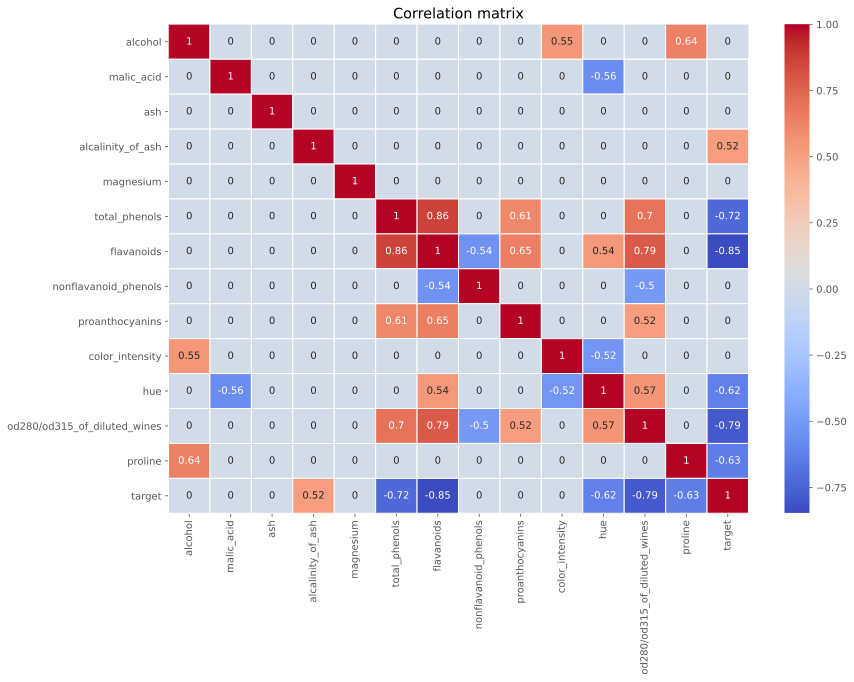

In [11]:
plt.figure(figsize=(13, 9))
X_corr = X.corr()
X_corr[np.abs(X_corr) <= 0.5] = 0
sns.heatmap(X_corr, annot=True, linewidths=1, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [52]:
X_corr.loc[(np.abs(X_corr['target']) > 0.5) & (X_corr['target'] != 1)].target

alcalinity_of_ash               0.52
total_phenols                  -0.72
flavanoids                     -0.85
hue                            -0.62
od280/od315_of_diluted_wines   -0.79
proline                        -0.63
Name: target, dtype: float64

In [13]:
high_corr = list(X_corr[np.abs(X_corr['target']) >
                        0.5].drop('target', axis=0).index)
high_corr

['alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.

In [14]:
X.drop('target', axis=1, inplace=True)

In [15]:
X = X.merge(X[high_corr].pow(2), left_index=True,
            right_index=True, suffixes='_2')
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash_,magnesium,total_phenols_,flavanoids_,nonflavanoid_phenols,proanthocyanins,color_intensity,hue_,od280/od315_of_diluted_wines_,proline_,alcalinity_of_ash2,total_phenols2,flavanoids2,hue2,od280/od315_of_diluted_wines2,proline2
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,391.14,5.66,5.11,0.97,7.32,656459.14
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91,133.67,2.94,4.21,0.44,3.58,555859.14
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,112.36,0.96,0.12,0.23,1.61,77284.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50,295.84,3.04,1.45,0.61,3.75,250501.00
50%,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50,380.25,5.55,4.56,0.93,7.73,453604.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00,462.25,7.84,8.27,1.25,10.05,970225.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,900.00,15.05,25.81,2.92,16.00,2822400.00
